<a href="https://colab.research.google.com/github/TACH00/Examen1/blob/main/Consumer_Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [3]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar archivo excel desde equipo
from google.colab import files
files.upload()

In [ ]:
#Convertir en Dataframe
df=pd.read_excel('consumer_mit_lift_lab.xlsx')
df.head()

In [116]:
#Verificamos información del DataFrame para reconocer las variables que son cuantitativas y cualitativas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   _record_id                                115 non-null    object 
 1   _title                                    115 non-null    object 
 2   _server_updated_at                        115 non-null    object 
 3   _updated_by                               115 non-null    object 
 4   _geometry                                 115 non-null    object 
 5   _latitude                                 115 non-null    float64
 6   _longitude                                115 non-null    float64
 7   282_payment_method_that_purchase          115 non-null    object 
 8   283_fulfill_needs                         115 non-null    object 
 9   300_did_not_find                          6 non-null      object 
 10  237_distance_household_interviewee    

In [ ]:
#Filtro por columnas, de acuerdo a la información obtenida arriba obtenemos las cuantitativas
cuant=df.iloc[ : , [5,6,12,26,27,28,29,30,31]]  #columnas no consecutivas 
cuant

In [114]:
cuant.info() #Verificamos que los datos correspondan al tipo entero o float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _latitude                            115 non-null    float64
 1   _longitude                           115 non-null    float64
 2   238_frequency_buying_store           115 non-null    int64  
 3   81_number_online_purchases_month     115 non-null    int64  
 4   288_number_app_purchases_month       115 non-null    int64  
 5   289_number_whatsapp_purchases_month  115 non-null    int64  
 6   83_willingness_ultrafast_delivery    115 non-null    int64  
 7   84_willingness_sameday_delivery      115 non-null    int64  
 8   241_age_of_the_interviewee           115 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 8.2 KB


In [20]:
#Filtro por columnas, de acuerdo a la información obtenida arriba obtenemos las cualitativas
cual=df.iloc[ : , [0,1,2,3,4,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,32,33,34,35]]

In [118]:
cual.info() #Verificamos que entre los datos no hayan cuantitativos y que la suma de ambos nuevos subdf de el total del df original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   _record_id                                115 non-null    object
 1   _title                                    115 non-null    object
 2   _server_updated_at                        115 non-null    object
 3   _updated_by                               115 non-null    object
 4   _geometry                                 115 non-null    object
 5   282_payment_method_that_purchase          115 non-null    object
 6   283_fulfill_needs                         115 non-null    object
 7   300_did_not_find                          6 non-null      object
 8   237_distance_household_interviewee        115 non-null    object
 9   299_means_transportation_consumer         115 non-null    object
 10  284_additional_products_store             4 non-nu

In [ ]:
#Eliminar columnas innecesarias, en este caso elimine aquellas que no representaban una cantidad significativa de acuerdo al total de datos (115), además que
# la columna de las fotografias tenia nulos y no nos daba una información de calidad, por ende las elimine, para tener una mejor calidad de los datos 
cual1=cual.drop(["300_did_not_find", "284_additional_products_store", "304_additional_services_store", "storefront_picture_just_once_if_possible"], axis=1) #axis1=columnas y axis0=filas
cual1.info()

In [159]:
#Imprimo todas las columnas que aun contienen nulos para analizarla y así determinar que metodo de sustitución ocupar
cual2=cual1.iloc[ : , [10,12,14,16,18]]  #columnas no consecutivas 
cual2

,305_electricity_bill_store,306_water_bill_store,307_gas_bill_store,308_topups_in_store,309_wiretransfers_in_store
0,no,no,no,no,no
1,no,no,no,no,no
2,yes,yes,yes,yes,no
3,no,no,no,no,no
4,no,no,no,no,no
...,...,...,...,...,...
110,no,no,no,no,no
111,no,no,no,no,no
112,no,no,no,no,no
113,no,no,no,no,no


In [48]:
#A sabiendas que todos son de tipo si o no, lo mejor para agilizar este caso sería sustituir con el metodo de bfill o ffill, además de que sería el más
#indicado también porque por lo general es de esperarse que los resultados se presenten muy cerca en el tiempo
cual1["305_electricity_bill_store"]=cual1["305_electricity_bill_store"].fillna(method="ffill")
cual1["306_water_bill_store"]=cual1["306_water_bill_store"].fillna(method="ffill")
cual1["307_gas_bill_store"]=cual1["307_gas_bill_store"].fillna(method="ffill")
cual1["308_topups_in_store"]=cual1["308_topups_in_store"].fillna(method="bfill")
cual1["309_wiretransfers_in_store"]=cual1["309_wiretransfers_in_store"].fillna(method="bfill")

In [160]:
#Vamos verificando que los reaultados sean correctos, marcando todos los valores como no nulos o marcando 0 nulos con .info() o identificación de nulos respect.
cual1.info()
#Identificar valores nulos por columna
#valores_nulos=cual1.isnull().sum()
#valores_nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   _record_id                          115 non-null    object
 1   _title                              115 non-null    object
 2   _server_updated_at                  115 non-null    object
 3   _updated_by                         115 non-null    object
 4   _geometry                           115 non-null    object
 5   282_payment_method_that_purchase    115 non-null    object
 6   283_fulfill_needs                   115 non-null    object
 7   237_distance_household_interviewee  115 non-null    object
 8   299_means_transportation_consumer   115 non-null    object
 9   301_electricity_bill                115 non-null    object
 10  305_electricity_bill_store          115 non-null    object
 11  302_water_bill                      115 non-null    object

De esta manera quedaron listas las columnas sin nulos, ahora se aplicara a las cuantitativas

In [161]:
cuant.info()
#Con esto corroboramos que no hay ningun valor nulo en las columnas cuantitativas, por lo que ahora procederemos a identificar los outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _latitude                            115 non-null    float64
 1   _longitude                           115 non-null    float64
 2   238_frequency_buying_store           115 non-null    int64  
 3   81_number_online_purchases_month     115 non-null    int64  
 4   288_number_app_purchases_month       115 non-null    int64  
 5   289_number_whatsapp_purchases_month  115 non-null    int64  
 6   83_willingness_ultrafast_delivery    115 non-null    int64  
 7   84_willingness_sameday_delivery      115 non-null    int64  
 8   241_age_of_the_interviewee           115 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 8.2 KB


In [162]:
cuant.head()
#De acuerdo a la información que nos presenta, a todas menos la lalitud y longitud le podremos aplicar outliers pues ya que estos debemos estar concientes
#que dentro del rango que estan, pueden variar ya que estamos tomando la información en puntos posiblemente muy diferentes de la ciudad
#aclaro que la edad la tome como cuantitativa porque puede servir para analisis estadisticos de identificar el mayor publico consumidor o similar

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,19.059841,-98.234980,1,1,0,0,0,0,35
1,19.058479,-98.233566,1,1,2,0,35,50,27
2,19.062077,-98.230339,1,0,0,0,40,25,42
3,19.055535,-98.232916,1,2,3,0,0,0,27
4,19.059012,-98.232994,1,2,5,0,0,50,35


In [ ]:
#Filtro por columnas dejando fuera las 2 mencionadas anteriormente
cuant1=cuant.iloc[ : , 2:9]
cuant1

<Figure size 1080x576 with 0 Axes>

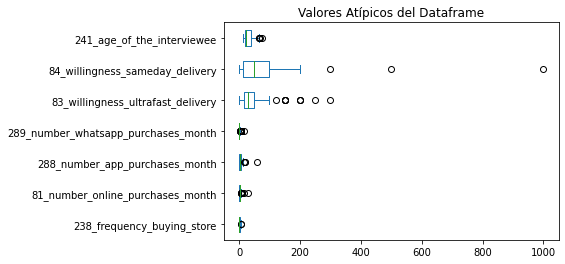

In [163]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuant1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos || Use este metodo ya que estamos hablando de valores de la vida real por lo que de
#antemano sabemos que deben o pueden variar mucho entre sí y para tener una mayor consideración con el número final de datos
y=cuant1
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido: ", Limite_Superior)
print("Limite inferior permitido: ", Limite_Inferior)

In [ ]:
#Encontramos Ouliers del Dataframe
outliers=cuant1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
cuant2= cuant1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuant2

In [169]:
#Corroboramos valores nulos del dataframe4 || Observamos que son pocos gracias a la tecnica de desviación, por lo que ahora sería bueno sustituir con medidas
#de tendencia central
valores_nulos=cuant2.isnull().sum()
valores_nulos

238_frequency_buying_store             2
81_number_online_purchases_month       2
288_number_app_purchases_month         1
289_number_whatsapp_purchases_month    1
83_willingness_ultrafast_delivery      2
84_willingness_sameday_delivery        2
241_age_of_the_interviewee             1
dtype: int64

In [170]:
#Sustituir valores nulos con promedio o mediana
cuant2["238_frequency_buying_store"]=cuant2["238_frequency_buying_store"].fillna(round(cuant2["238_frequency_buying_store"].mean(),1))
cuant2["81_number_online_purchases_month"]=cuant2["81_number_online_purchases_month"].fillna(round(cuant2["81_number_online_purchases_month"].mean(),1))
cuant2["288_number_app_purchases_month"]=cuant2["288_number_app_purchases_month"].fillna(round(cuant2["288_number_app_purchases_month"].mean(),1))
cuant2["289_number_whatsapp_purchases_month"]=cuant2["289_number_whatsapp_purchases_month"].fillna(round(cuant2["289_number_whatsapp_purchases_month"].median(),1))
cuant2["83_willingness_ultrafast_delivery"]=cuant2["83_willingness_ultrafast_delivery"].fillna(round(cuant2["83_willingness_ultrafast_delivery"].median(),1))
cuant2["84_willingness_sameday_delivery"]=cuant2["84_willingness_sameday_delivery"].fillna(round(cuant2["84_willingness_sameday_delivery"].median(),1))
cuant2["241_age_of_the_interviewee"]=cuant2["241_age_of_the_interviewee"].fillna(round(cuant2["241_age_of_the_interviewee"].mean(),1))

In [171]:
valores_nulos=cuant2.isnull().sum()
valores_nulos

238_frequency_buying_store             0
81_number_online_purchases_month       0
288_number_app_purchases_month         0
289_number_whatsapp_purchases_month    0
83_willingness_ultrafast_delivery      0
84_willingness_sameday_delivery        0
241_age_of_the_interviewee             0
dtype: int64

In [ ]:
#Filtro por columnas
faltantes=cuant.iloc[ : , [0,1]]
faltantes

In [173]:
# Unimos las columnas faltantes con el dataframe de cuantitativas limpio
cuantitativas= pd.concat([faltantes, cuant2], axis=1)
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _latitude                            115 non-null    float64
 1   _longitude                           115 non-null    float64
 2   238_frequency_buying_store           115 non-null    float64
 3   81_number_online_purchases_month     115 non-null    float64
 4   288_number_app_purchases_month       115 non-null    float64
 5   289_number_whatsapp_purchases_month  115 non-null    float64
 6   83_willingness_ultrafast_delivery    115 non-null    float64
 7   84_willingness_sameday_delivery      115 non-null    float64
 8   241_age_of_the_interviewee           115 non-null    float64
dtypes: float64(9)
memory usage: 8.2 KB


In [158]:
ConsumerLimpio= pd.concat([cuantitativas, cual1], axis=1)
ConsumerLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _latitude                            115 non-null    float64
 1   _longitude                           115 non-null    float64
 2   238_frequency_buying_store           115 non-null    float64
 3   81_number_online_purchases_month     115 non-null    float64
 4   288_number_app_purchases_month       115 non-null    float64
 5   289_number_whatsapp_purchases_month  115 non-null    float64
 6   83_willingness_ultrafast_delivery    115 non-null    float64
 7   84_willingness_sameday_delivery      115 non-null    float64
 8   241_age_of_the_interviewee           115 non-null    float64
 9   _record_id                           115 non-null    object 
 10  _title                               115 non-null    object 
 11  _server_updated_at              

Hay que aclarar que el dataframe ya no tiene el mismo tamaño pues recordemos que eliminamos 4 variables que no eran relevantes por su tamaño e información sin forma

In [174]:
#Corroboramos valores nulos en todo el dataframe
valores_nulos=ConsumerLimpio.isnull().sum().sum()
valores_nulos

0

In [175]:
#Convertir DataFrame a CSV
ConsumerLimpio.to_csv("ConsumerLimpio.csv")

In [176]:
#descargar archivo filtrado en csv
from google.colab import files 
files.download("ConsumerLimpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>